In [4]:
# STEP 01 : X, Y축에 대한 위치 행렬 계산

import torch

window_size = 2
coords_h = coords_w= torch.arange(window_size)
coords = torch.stack(torch.meshgrid([coords_h, coords_w], indexing='ij'))
coords_flatten = torch.flatten(coords,1)
relative_coords = coords_flatten[:, :, None] - coords_flatten[:, None, :]

print("STEP 01: X,Y축에 대한 위치행렬 계산 결과")
print(relative_coords)

STEP 01: X,Y축에 대한 위치행렬 계산 결과
tensor([[[ 0,  0, -1, -1],
         [ 0,  0, -1, -1],
         [ 1,  1,  0,  0],
         [ 1,  1,  0,  0]],

        [[ 0, -1,  0, -1],
         [ 1,  0,  1,  0],
         [ 0, -1,  0, -1],
         [ 1,  0,  1,  0]]])


In [5]:
# STEP 02 : Window 사이즈를 고려해 X, Y축에 대한 보정
x_coords = relative_coords[0, :, :]
y_coords = relative_coords[1, :, :]

x_coords += window_size - 1
y_coords += window_size - 1

x_coords *= 2* window_size - 1

print("STEP 02: Window Size를 고려한 보정된 위치행렬 계산 결과")
print(x_coords, y_coords, sep='\n')

# STEP 03 : X, Y축 위치행렬 정보를 종합
relative_position_index = x_coords + y_coords

print("\nSTEP 03: 종합적으로 고려된 위치행렬")
print(relative_position_index)

STEP 02: Window Size를 고려한 보정된 위치행렬 계산 결과
tensor([[3, 3, 0, 0],
        [3, 3, 0, 0],
        [6, 6, 3, 3],
        [6, 6, 3, 3]])
tensor([[1, 0, 1, 0],
        [2, 1, 2, 1],
        [1, 0, 1, 0],
        [2, 1, 2, 1]])

STEP 03: 종합적으로 고려된 위치행렬
tensor([[4, 3, 1, 0],
        [5, 4, 2, 1],
        [7, 6, 4, 3],
        [8, 7, 5, 4]])


위 위치행렬에 대한 해석

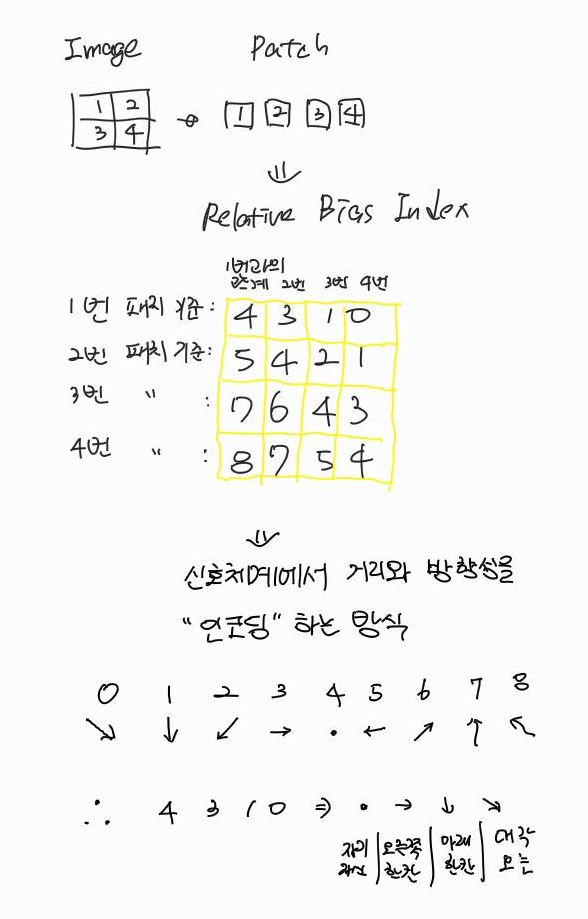